In [31]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from isolation import *

import matplotlib

In [32]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rc('axes', labelsize=18, titlesize=20)
matplotlib.rc('legend', fontsize=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [33]:
filename='/eos/user/a/aperego/Timing/root_files/TTbar_noPU/histo_TTbar_noPU.root'
file = uproot.open(filename)

In [34]:
file.keys()

['mtdEleIsoNtupler;1',
 'mtdEleIsoNtupler/electrons;1',
 'mtdEleIsoNtupler/tracks;1',
 'mtdEleIsoNtupler/vertices;1']

In [35]:
electrons = file["mtdEleIsoNtupler/electrons"]
tracks = file["mtdEleIsoNtupler/tracks"]
vertices = file["mtdEleIsoNtupler/vertices"]

In [36]:
#tracks.keys()

In [37]:
NEVENTS = 9000

In [38]:
nEle = electrons['nEle'].array()[:NEVENTS]
ele_energy = electrons['ele_energy'].array()[:NEVENTS]
ele_pt = electrons['ele_pt'].array()[:NEVENTS]
ele_eta = electrons['ele_eta'].array()[:NEVENTS]
ele_phi = electrons['ele_phi'].array()[:NEVENTS]
ele_dz = electrons['ele_dz'].array()[:NEVENTS]
ele_dxy = electrons['ele_dxy'].array()[:NEVENTS]
ele_track = electrons['ele_track'].array()[:NEVENTS]
ele_barrel = electrons['ele_barrel'].array()[:NEVENTS]
ele_prompt = electrons['ele_prompt'].array()[:NEVENTS]
ele_time = electrons['ele_time'].array()[:NEVENTS]
ele_timeErr = electrons['ele_timeErr'].array()[:NEVENTS]
ele_mva = electrons['ele_mva'].array()[:NEVENTS]
sum_pT = electrons['sum_pT'].array()[:NEVENTS]
nTracks = electrons['nTracks'].array()[:NEVENTS]

In [39]:
ele_sim_pt = electrons['ele_sim_pt'].array()[:NEVENTS]
ele_sim_time = electrons['ele_sim_time'].array()[:NEVENTS]
track_sim_pt = tracks['track_sim_pt'].array()[:NEVENTS]
track_sim_time = tracks['track_sim_time'].array()[:NEVENTS]

In [40]:
track_pt = tracks['track_pt'].array()[:NEVENTS]
track_dt_ele = tracks['track_dt_ele'].array()[:NEVENTS]
track_dt_vtx = tracks['track_dt_vtx'].array()[:NEVENTS]
track_dz_ele = tracks['track_dz_ele'].array()[:NEVENTS]
track_PVweight = tracks['track_PVweight'].array()[:NEVENTS]
track_time = tracks['track_time'].array()[:NEVENTS]
track_timeErr = tracks['track_timeErr'].array()[:NEVENTS]
track_mva = tracks['track_mva'].array()[:NEVENTS]
track_gen_matched = tracks['track_gen_matched'].array()[:NEVENTS]

In [41]:
vertex_time = vertices['vertex_time'].array()[:NEVENTS]
vertex_timeErr = vertices['vertex_timeErr'].array()[:NEVENTS]
vertex_nTracks = vertices['vertex_NumberofTracks'].array()[:NEVENTS]
event = vertices['event'].array()[:NEVENTS]

In [42]:
for i in range(10):
    print(f'There are {nEle[i]} in the {i+1}° event of which {sum(ele_prompt[i])} prompt')

There are 4 in the 1° event of which 0 prompt
There are 0 in the 2° event of which 0 prompt
There are 2 in the 3° event of which 0 prompt
There are 3 in the 4° event of which 0 prompt
There are 1 in the 5° event of which 0 prompt
There are 1 in the 6° event of which 1 prompt
There are 1 in the 7° event of which 0 prompt
There are 1 in the 8° event of which 0 prompt
There are 1 in the 9° event of which 0 prompt
There are 3 in the 10° event of which 0 prompt


In [43]:
print(f'Number of events: {len(event)}')

Number of events: 9000


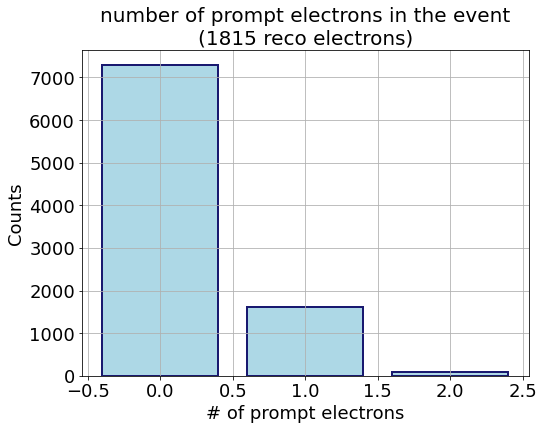

In [44]:
plt.figure(figsize=(8,6))
plt.hist(ak.sum(ele_prompt, axis=1), bins=3, range=(-0.5,2.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title(f'number of prompt electrons in the event\n({ak.sum(ak.sum(ele_prompt, axis=1))} reco electrons)')
plt.xlabel("# of prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

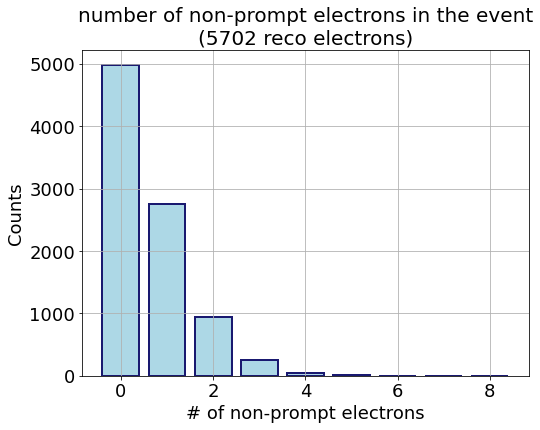

In [45]:
plt.figure(figsize=(8,6))
plt.hist(ak.count(ele_prompt, axis=1)-ak.sum(ele_prompt, axis=1), bins=9, range=(-0.5,8.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title(f'number of non-prompt electrons in the event\n({ak.sum(ak.count(ele_prompt, axis=1)-ak.sum(ele_prompt, axis=1))} reco electrons)')
plt.xlabel("# of non-prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

## efficiency studies

In [46]:
MVA_CUT = 0.5
NSIGMA = 3
ISO_CUT = 0.03
ELE_DZ = 0.2

## scan in dz, iso, sigma

In [47]:
# for ELE_DZ in [0.1,0.2,0.3]:
#     for ISO_CUT in [0.03,0.05,0.07,0.09]:
#         for NSIGMA in [1,2,3]:

#             ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isoefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], 
#                           ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
#                           ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
#                           track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
#                           NSIGMA=NSIGMA,ELE_DZ=ELE_DZ,ISO_CUT=ISO_CUT,SIGNAL=False)

#             ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isoefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], 
#                           ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], 
#                           track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
#                           ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
#                           NSIGMA=NSIGMA,ELE_DZ=ELE_DZ,ISO_CUT=ISO_CUT,SIGNAL=False)             

#             #plt.style.use(hep.style.CMS)
#             fig = plt.figure(figsize=(16,7))
#             plt.suptitle("dt cut at " + str(NSIGMA) + " $\sigma$, ele dz: " + str(ELE_DZ) + "cm, ISO CUT: " + str(ISO_CUT), fontsize=20, y=0.97)
#             bins=np.array([10,20,30,40,50,60,70,80])
#             ax = iso_eff_plot(bins, ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E, title="iso efficiency on bkg electrons - ETL (errors*0.2)", pos=122)
#             plt.grid()
#             iso_eff_plot(bins, ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B, title="iso efficiency on bkg electrons - BTL (errors*0.2)", pos=121, ax=ax)
#             plt.grid()
#             fig.tight_layout()
#             plt.savefig("plots/bkg_iso_eff_dt_" + str(NSIGMA) + "s_dz_"+ str(ELE_DZ) + "_ISOcut_" + str(ISO_CUT)+".png")
#             plt.close()

## efficiency - SIM vs RECO

In [48]:
ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isoefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isoefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

In [49]:
SCALE = 0.2

In [50]:
def list2hist(hist,den,bins,SCALE=1):
    num, _ = np.histogram(hist, bins=bins)
    ratio = num / den
    err = SCALE * np.sqrt( (num+1) / (den**2) + (num+1)**2 / (den**3) )
    return ratio, err

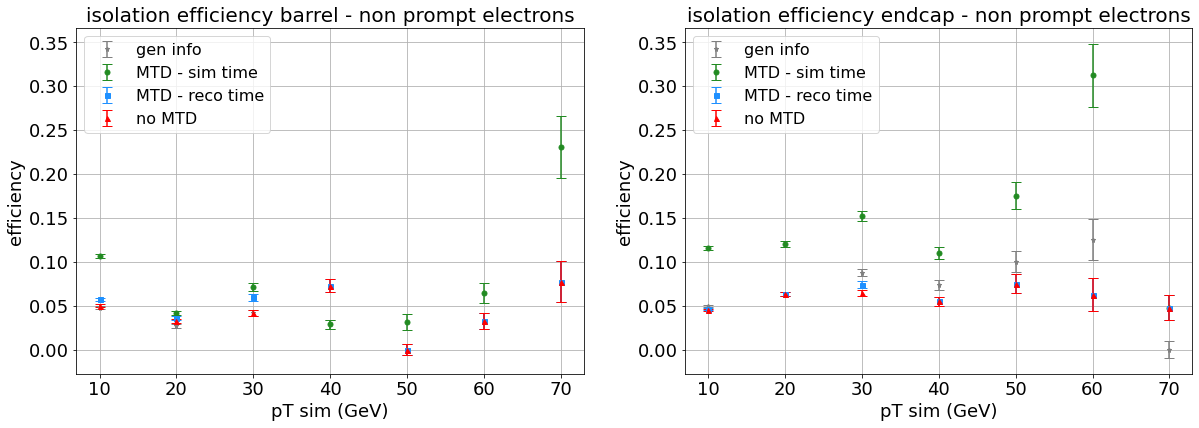

In [51]:
bins=np.array([10,20,30,40,50,60,70,80])
pt_tot, bins = np.histogram(ele_pt_B, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_B, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_B, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_B, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_B, pt_tot, bins, SCALE)

#plt.style.use(hep.style.CMS)
plt.figure(figsize=(20,14))

#plt.suptitle("Efficiency for non prompt electron (TTbar) - 0 PU")

ax = plt.subplot(221)
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency barrel - non prompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="upper left")

################################

pt_tot, bins = np.histogram(ele_pt_E, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_E, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_E, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_E, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_E, pt_tot, bins, SCALE)

plt.subplot(222, sharey=ax)
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency endcap - non prompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="upper left")

plt.show()

## save isolation for ROC

In [52]:
ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B = isolation(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2, SIGNAL=False)

ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E = isolation(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2, SIGNAL=False)

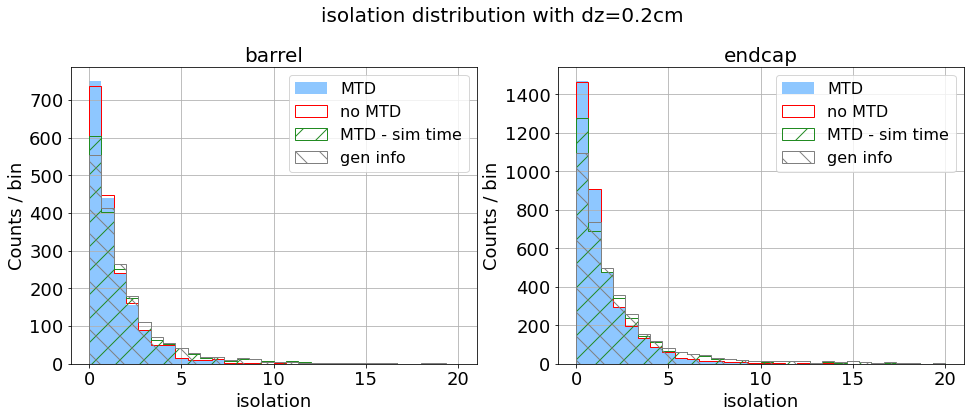

In [53]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0,20)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

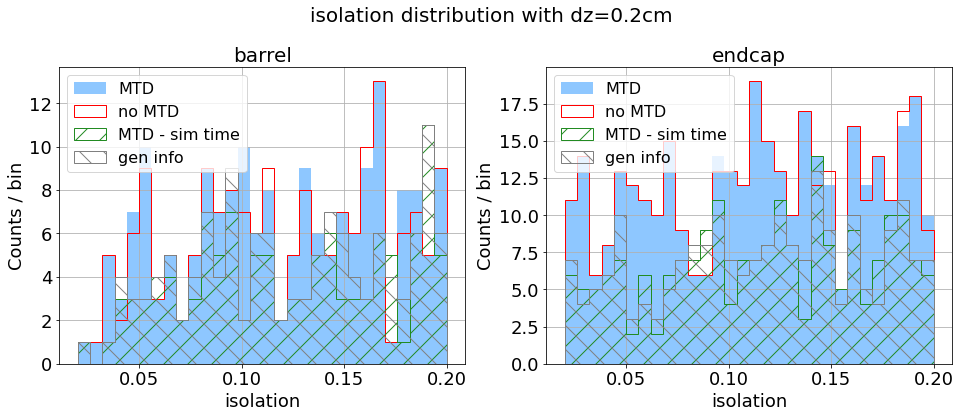

In [54]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0.02,0.2)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

In [55]:
np.savetxt("bkg_ele_iso_noMTD_B_0PU.txt", ele_iso_noMTD_B)
np.savetxt("bkg_ele_iso_noMTD_E_0PU.txt", ele_iso_noMTD_E)
np.savetxt("bkg_ele_iso_MTD_B_0PU.txt", ele_iso_MTD_B)
np.savetxt("bkg_ele_iso_MTD_E_0PU.txt", ele_iso_MTD_E)
np.savetxt("bkg_ele_sim_iso_MTD_B_0PU.txt", ele_sim_iso_MTD_B)
np.savetxt("bkg_ele_sim_iso_MTD_E_0PU.txt", ele_sim_iso_MTD_E)
np.savetxt("bkg_ele_gen_iso_MTD_B_0PU.txt", ele_gen_iso_MTD_B)
np.savetxt("bkg_ele_gen_iso_MTD_E_0PU.txt", ele_gen_iso_MTD_E)

In [56]:
#iso_step = np.linspace(0.02, 0.2, 50)
iso_bkg_noMTD_B, iso_bkg_MTD_B, iso_bkg_sim_MTD_B, iso_bkg_gen_MTD_B = iso_for_plot(ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B)
iso_bkg_noMTD_E, iso_bkg_MTD_E, iso_bkg_sim_MTD_E, iso_bkg_gen_MTD_E = iso_for_plot(ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E)

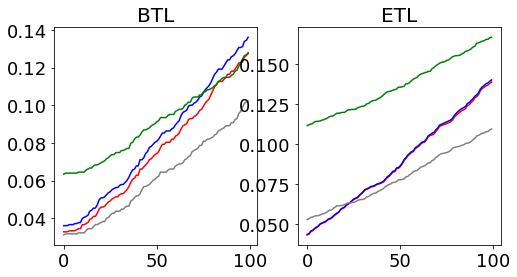

In [57]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("BTL")
plt.plot(iso_bkg_noMTD_B, c="r")
plt.plot(iso_bkg_MTD_B, c="b")
plt.plot(iso_bkg_sim_MTD_B, c="green")
plt.plot(iso_bkg_gen_MTD_B, c="grey")

plt.subplot(122)
plt.title("ETL")
plt.plot(iso_bkg_noMTD_E, c="r")
plt.plot(iso_bkg_MTD_E, c="b")
plt.plot(iso_bkg_sim_MTD_E, c="green")
plt.plot(iso_bkg_gen_MTD_E, c="grey")

plt.show()

## dt distributions

In [95]:
#distribution od dt between tracks and electron - sim vs reco
def DT_distribution(ele_prompt, ele_track, ele_dz, ele_dxy, ele_sim_time, ele_time, ele_timeErr, track_dz_ele, track_sim_time, track_time, track_timeErr, track_PVweight, ELE_DZ=0.2, SIGNAL=True):
    ele_dt_B = []
    ele_reco_dt_B = []
    ele_reco_dt_matched_B = []
    nosim = 0
    noreco = 0
    for ev in range(len(ele_prompt)):
        for ele_idx in range(len(ele_prompt[ev])):
            # check sulla trackref (se -1 skip)
            if (ele_track[ev][ele_idx]==-1):
                continue

            # cut on dxy, dz wrt to the PV
            if (ele_dz[ev][ele_idx]>0.5 or ele_dxy[ev][ele_idx]>0.2):
                continue
            # if prompt -> signal, if not -> bkg
            if SIGNAL:
                if not ele_prompt[ev][ele_idx]:
                    continue
            else:
                if ele_prompt[ev][ele_idx]:
                    continue
            eleTime = ele_time[ev][ele_idx]
            eleTimeErr = ele_timeErr[ev][ele_idx]
            eleSimTime = ele_sim_time[ev][ele_idx]
            # loop over tracks 
            for trk_idx in range(len(track_dz_ele[ev][ele_idx])):
                if (track_dz_ele[ev][ele_idx][trk_idx] > ELE_DZ or track_PVweight[ev][ele_idx][trk_idx] < 0.8):
                    continue

                trSimTime  = track_sim_time[ev][ele_idx][trk_idx]
                
                if (trSimTime != -1 and eleSimTime != -1):
                    ele_dt_B.append(abs(trSimTime-eleSimTime))
                else:
                    ele_dt_B.append(-1)
                    nosim += 1

                trTime  = track_time[ev][ele_idx][trk_idx]
                trTimeErr  = track_timeErr[ev][ele_idx][trk_idx]
                
                if (trTimeErr != -1 and eleTimeErr != -1):
                    ele_reco_dt_B.append(abs(trTime-eleTime))
                else:
                    ele_reco_dt_B.append(-1)
                    noreco += 1
    return np.array(ele_dt_B), np.array(ele_reco_dt_B), nosim, noreco

In [ ]:
# ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = DT_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
#                                                                      track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], track_PVweight[ele_barrel], ELE_DZ=0.2, SIGNAL=False)
# ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = DT_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], ele_time[~ele_barrel], ele_timeErr[~ele_barrel], 
#                                                                      track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], track_PVweight[~ele_barrel], ELE_DZ=0.2, SIGNAL=False)

In [100]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                                                                     track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ELE_DZ=0.2, SIGNAL=False)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], ele_time[~ele_barrel], ele_timeErr[~ele_barrel], 
                                                                     track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=False)

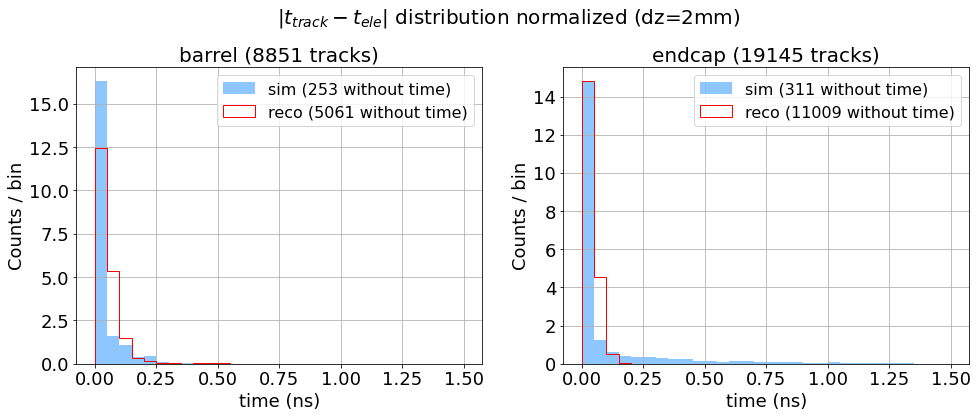

In [101]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{ele}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

In [102]:
len(ele_dt_E[ele_dt_E>0.25])

2507

In [103]:
len(ele_dt_B[ele_dt_B>0.25])

93

## with the vertex

In [108]:
ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isovertexefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], vertex_time, vertex_timeErr, 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isovertexefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          vertex_time, vertex_timeErr, track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

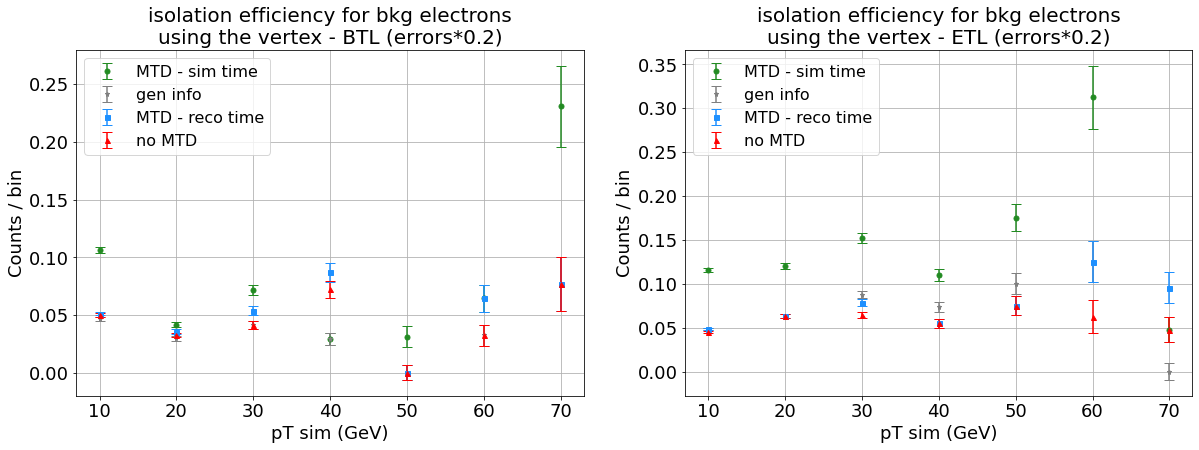

In [109]:
SCALE=0.2

bins=np.array([10,20,30,40,50,60,70,80])
pt_tot, bins = np.histogram(ele_pt_B, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_B, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_B, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_B, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_B, pt_tot, bins, SCALE)

#plt.style.use(hep.style.CMS)
plt.figure(figsize=(20,14))
plt.subplot(221)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency for bkg electrons\nusing the vertex - BTL (errors*0.2)")
plt.xlabel("pT sim (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")

################################

pt_tot, bins = np.histogram(ele_pt_E, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_E, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_E, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_E, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_E, pt_tot, bins, SCALE)

plt.subplot(222)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency for bkg electrons\nusing the vertex - ETL (errors*0.2)")
plt.xlabel("pT sim (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")

plt.show()

### isolation

In [73]:
ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B = vertexisolation(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], vertex_time, vertex_timeErr, 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2, SIGNAL=False)

ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E = vertexisolation(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          vertex_time, vertex_timeErr, track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2, SIGNAL=False)

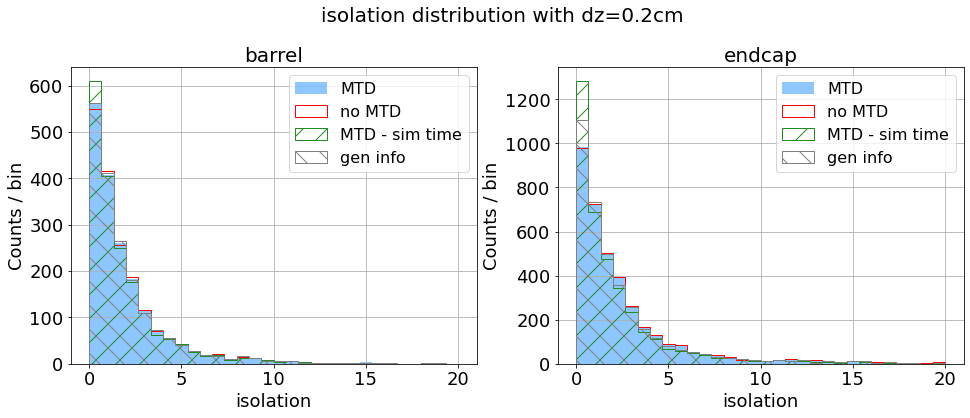

In [74]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0,20)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

In [80]:
np.savetxt("vtx_bkg_ele_iso_noMTD_B.txt", ele_iso_noMTD_B)
np.savetxt("vtx_bkg_ele_iso_noMTD_E.txt", ele_iso_noMTD_E)
np.savetxt("vtx_bkg_ele_iso_MTD_B.txt", ele_iso_MTD_B)
np.savetxt("vtx_bkg_ele_iso_MTD_E.txt", ele_iso_MTD_E)
np.savetxt("vtx_bkg_ele_sim_iso_MTD_B.txt", ele_sim_iso_MTD_B)
np.savetxt("vtx_bkg_ele_sim_iso_MTD_E.txt", ele_sim_iso_MTD_E)
np.savetxt("vtx_bkg_ele_gen_iso_MTD_B.txt", ele_gen_iso_MTD_B)
np.savetxt("vtx_bkg_ele_gen_iso_MTD_E.txt", ele_gen_iso_MTD_E)

In [76]:
#iso_step = np.linspace(0.02, 0.2, 50)
iso_bkg_noMTD_B, iso_bkg_MTD_B, iso_bkg_sim_MTD_B, iso_bkg_gen_MTD_B = iso_for_plot(ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B)
iso_bkg_noMTD_E, iso_bkg_MTD_E, iso_bkg_sim_MTD_E, iso_bkg_gen_MTD_E = iso_for_plot(ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E)

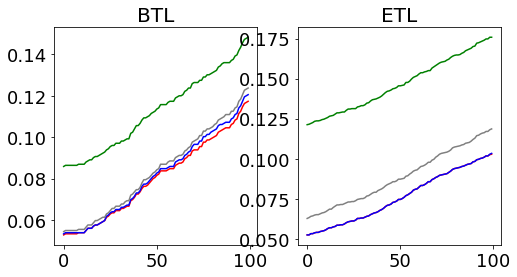

In [79]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("BTL")
plt.plot(iso_bkg_noMTD_B, c="r")
plt.plot(iso_bkg_MTD_B, c="b")
plt.plot(iso_bkg_sim_MTD_B, c="green")
plt.plot(iso_bkg_gen_MTD_B, c="grey")

plt.subplot(122)
plt.title("ETL")
plt.plot(iso_bkg_noMTD_E, c="r")
plt.plot(iso_bkg_MTD_E, c="b")
plt.plot(iso_bkg_sim_MTD_E, c="green")
plt.plot(iso_bkg_gen_MTD_E, c="grey")

plt.show()

### dt distribution with the vertex

In [69]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = vertex_dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], vertex_time, 
                                                                   vertex_timeErr, track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], 
                                                                   ELE_DZ=0.2, SIGNAL=False)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = vertex_dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], 
                                                                   vertex_time, vertex_timeErr, track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], 
                                                                   track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=False)

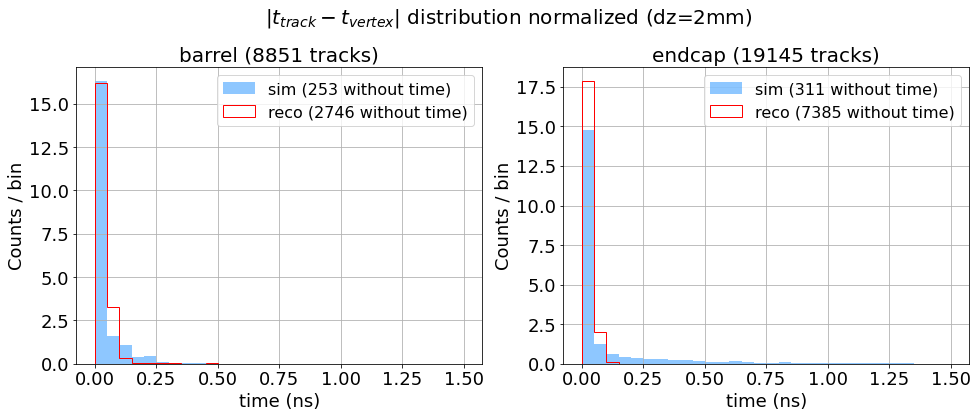

In [70]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{vertex}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

## $(t_R - t_S) / \sigma_t$

In [91]:
ELE_DZ = 0.2

ele_delta_t = []
track_delta_t = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if (ele_dz[ev][ele]>0.5 or ele_dxy[ev][ele]>0.2):
            continue
        if ele_prompt[ev][ele]:
            continue
        if ele_sim_time[ev][ele]!=-1 and ele_timeErr[ev][ele]>0:
            ele_delta_t.append((-ele_sim_time[ev][ele]+ele_time[ev][ele])/ele_timeErr[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_mva[ev][ele][trk]<0.5:
                continue
            # cut in dz with ele, tunable
            if (track_dz_ele[ev][ele][trk] > ELE_DZ or track_PVweight[ev][ele][trk] < 0.8):
                continue
            if track_sim_time[ev][ele][trk]!=-1 and track_timeErr[ev][ele][trk]>0:
                track_delta_t.append((-track_sim_time[ev][ele][trk]+track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])
#                 if (((track_sim_time[ev][ele][trk]-track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])<-10):
#                     print(track_sim_time[ev][ele][trk],track_time[ev][ele][trk],track_timeErr[ev][ele][trk])

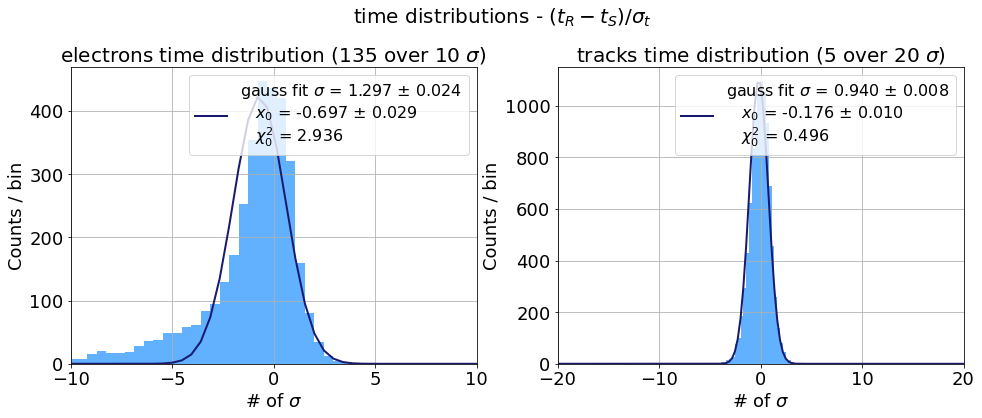

In [92]:
BINS=200

plt.figure(figsize=(16,12))
plt.suptitle("time distributions - $(t_R - t_S) / \sigma_t$", fontsize=20, y=0.95)

plt.subplot(221)
res, chi2 = gauss_fit_and_plot(ele_delta_t, init_parms=[400,0,1], label="ele", bins=BINS)
AA = np.array(ele_delta_t)
ot = len(AA[AA>10])+len(AA[AA<-10])
plt.title(f'electrons time distribution ({ot} over 10 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.xlim(-10,10)
# plt.legend()
# plt.grid() 

plt.subplot(222)
res_sim, chi2_sim = gauss_fit_and_plot(track_delta_t, init_parms=[3000,0,1], label="tracks", bins=BINS)
AA = np.array(track_delta_t)
ot = len(AA[AA>20])+len(AA[AA<-20])
plt.title(f'tracks time distribution ({ot} over 20 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
# plt.legend()
plt.xlim(-20,20)
# plt.grid() 

plt.show()

## isolation efficiency restricting to PV

In [104]:
# computes isolation efficiency using electron time
def PVisoefficiency(ele_prompt, ele_track, ele_sim_pt, ele_PT, ele_dz, ele_dxy, track_sim_pt, track_pt, 
                  track_dz_ele, track_sim_time, ele_sim_time, 
                  track_time, track_timeErr, ele_time, ele_timeErr, track_mva, ele_mva, track_gen_matched, track_PVweight,
                  NSIGMA=3, ELE_DZ=0.2, ISO_CUT=0.03, SIGNAL=True):
    ele_pt = []
    ele_pt_noMTD = []
    ele_pt_MTD = []
    ele_sim_pt_MTD = []
    ele_gen_pt_MTD = []
    
    MVA_CUT=0.5
    ERR = (ak.mean(track_timeErr[track_timeErr!=-1])**2+ak.mean(track_timeErr[track_timeErr!=-1])**2)**0.5

    for ev in range(len(ele_prompt)):
        for ele_idx in range(len(ele_prompt[ev])):
            if (ele_sim_pt[ev][ele_idx]==-1):
                continue
            # check on valid trackref
            if (ele_track[ev][ele_idx]==-1):
                continue

            pt = ele_sim_pt[ev][ele_idx]
            pt_reco = ele_PT[ev][ele_idx]
            # cut on dxy, dz wrt to the PV
            if (ele_dz[ev][ele_idx]>0.5 or ele_dxy[ev][ele_idx]>0.2):
                continue
            # if prompt -> signal, if not -> bkg
            if SIGNAL:
                if not ele_prompt[ev][ele_idx]:
                    continue
            else:
                if ele_prompt[ev][ele_idx]:
                    continue

            ele_pt.append(pt)

            sum_sim_mtd = 0
            sum_noMtd = 0
            sum_mtd = 0  
            sum_gen_mtd = 0
            
            # loop over tracks
            for trk_idx in range(len(track_sim_pt[ev][ele_idx])):
                if (track_sim_pt[ev][ele_idx][trk_idx]==-1 or track_PVweight[ev][ele_idx][trk_idx]<0.8):
                    continue
                # cut in dz with ele, tunable
                if (track_dz_ele[ev][ele_idx][trk_idx] > ELE_DZ):
                    continue
                # no MTD
                sum_noMtd += track_pt[ev][ele_idx][trk_idx]
                
                trSimTime  = track_sim_time[ev][ele_idx][trk_idx]
                eleSimTime = ele_sim_time[ev][ele_idx]
                trTime  = track_time[ev][ele_idx][trk_idx]
                trErr   = track_timeErr[ev][ele_idx][trk_idx]
                eleTime = ele_time[ev][ele_idx]
                eleErr  = ele_timeErr[ev][ele_idx]
                # SIM
                if (trSimTime != -1 and eleSimTime != -1):
                    # add track and pt for time 
                    if abs(trSimTime-eleSimTime) < (NSIGMA*ERR):
                        sum_sim_mtd += track_sim_pt[ev][ele_idx][trk_idx]
                else:
                    # no time, add anyway 
                    sum_sim_mtd += track_sim_pt[ev][ele_idx][trk_idx]
                
                # mva cut
                if (track_mva[ev][ele_idx][trk_idx] < MVA_CUT):
                    trErr = -1
                if (ele_mva[ev][ele_idx] < MVA_CUT):
                    eleErr = -1
                # RECO
                if (trErr > 0 and eleErr > 0):
                    # add track and pt for time 
                    if (abs(trTime-eleTime) < (NSIGMA*(trErr**2+eleErr**2)**0.5)):
                        sum_mtd += track_pt[ev][ele_idx][trk_idx]
                else:
                    sum_mtd += track_pt[ev][ele_idx][trk_idx]
                # GEN   
                if track_gen_matched[ev][ele_idx][trk_idx]:
                    sum_gen_mtd += track_sim_pt[ev][ele_idx][trk_idx]
                    
            # compute relative iso and check cut            
            if (sum_sim_mtd / pt < ISO_CUT):
                ele_sim_pt_MTD.append(pt)         
            if (sum_noMtd / pt_reco < ISO_CUT):
                ele_pt_noMTD.append(pt)
            if (sum_mtd / pt_reco < ISO_CUT):
                ele_pt_MTD.append(pt)
            if (sum_gen_mtd / pt < ISO_CUT):    
                ele_gen_pt_MTD.append(pt)
    return ele_pt, ele_pt_noMTD, ele_pt_MTD, ele_sim_pt_MTD, ele_gen_pt_MTD

In [106]:
ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = PVisoefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], track_PVweight[ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = PVisoefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], track_PVweight[~ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05, SIGNAL=False)

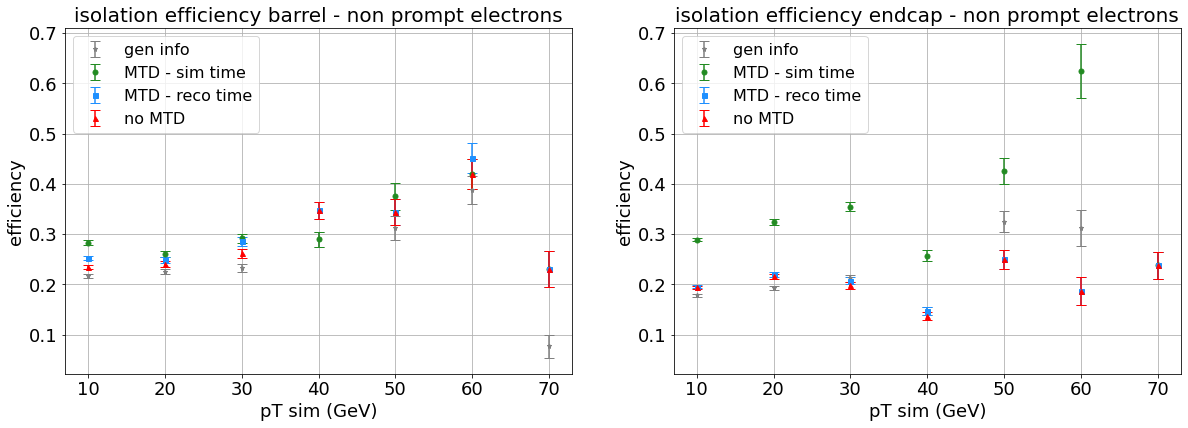

In [107]:
bins=np.array([10,20,30,40,50,60,70,80])
pt_tot, bins = np.histogram(ele_pt_B, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_B, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_B, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_B, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_B, pt_tot, bins, SCALE)

#plt.style.use(hep.style.CMS)
plt.figure(figsize=(20,14))

#plt.suptitle("Efficiency for non prompt electron (TTbar) - 0 PU")

ax = plt.subplot(221)
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency barrel - non prompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="upper left")

################################

pt_tot, bins = np.histogram(ele_pt_E, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_E, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_E, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_E, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_E, pt_tot, bins, SCALE)

plt.subplot(222, sharey=ax)
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency endcap - non prompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="upper left")

plt.show()